## **1: Data Exploration**

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("text_class - text_class.csv")

# Display first 5 rows
print(df.head())

# Total number of rows and unique labels
print(f"Total rows: {len(df)}")
print(f"Unique labels: {df['label'].nunique()} - {df['label'].unique()}")

# Check for missing values
print(df.isnull().sum())


                                                text     label
0                 I loved the product, it's amazing!  positive
1    Terrible service, I will never shop here again.  negative
2    The quality is good, but the delivery was late.   neutral
3  Absolutely wonderful experience, highly recomm...  positive
4  Product was damaged when it arrived, very disa...  negative
Total rows: 8
Unique labels: 3 - ['positive' 'negative' 'neutral']
text     0
label    0
dtype: int64


**Explanation:**
We first load the dataset and inspect the top 5 rows. We then check how many entries exist and how many unique classification labels are present. A check for missing data is a necessary step before preprocessing.


**2: Preprocessing Text Data**

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords and punkt if not already
nltk.download('punkt')
nltk.download('stopwords')
# Download punkt_tab as suggested by the error message
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and special chars
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocess)

# Show processed version of first 5 rows
print(df[['text', 'processed_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                text  \
0                 I loved the product, it's amazing!   
1    Terrible service, I will never shop here again.   
2    The quality is good, but the delivery was late.   
3  Absolutely wonderful experience, highly recomm...   
4  Product was damaged when it arrived, very disa...   

                                     processed_text  
0                             loved product amazing  
1                       terrible service never shop  
2                        quality good delivery late  
3  absolutely wonderful experience highly recommend  
4              product damaged arrived disappointed  


**Explanation:**
We convert all text to lowercase, remove punctuation and special characters using regex, tokenize it into words, and remove common stopwords using NLTK.

**3: Train a Classifier**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Vectorize the processed text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 0.50


**Explanation:**
We convert the processed text to numerical features using TF-IDF, then train a Logistic Regression classifier on the training set and evaluate accuracy on the test set.

**4: Evaluate the Model**

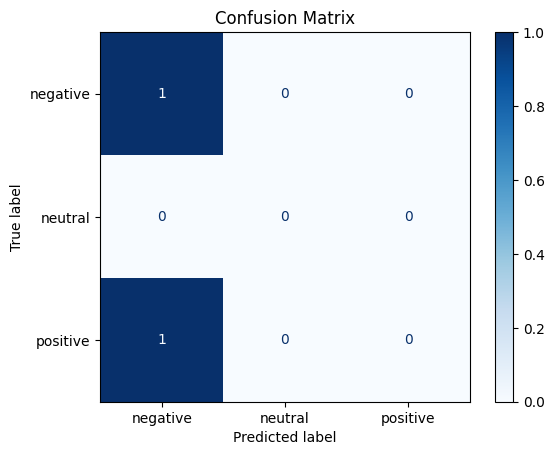

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


**Explanation:**
The confusion matrix helps us understand how many samples were correctly and incorrectly classified. It’s especially useful for analyzing which labels are being confused with others.